In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing

from assistments_workbench.models.model import classification_model
from assistments_workbench.config_reader import config

In [3]:
pylab.rcParams['figure.figsize'] = 9, 6
pylab.rcParams['font.size'] = 14

In [4]:
k = 5

In [5]:
input_data = pd.read_csv(os.path.join(config.get('localfiles', 'data_path'), '1415_PFA_simple.csv'))

In [6]:
input_data.describe()

,correct,skill_id,diff,pre_corr,pre_incorr
count,812333.000000,812333.000000,812333.000000,812333.000000,812333.000000
mean,0.726388,21968.816219,0.281346,3.518891,2.767355
std,0.445812,41171.053331,0.172914,5.232085,5.079812
min,0.000000,5898.000000,0.000000,0.000000,0.000000
25%,0.000000,6921.000000,0.168337,1.000000,0.000000
50%,1.000000,9244.000000,0.280830,2.000000,1.000000
75%,1.000000,14247.000000,0.400451,4.000000,3.000000
max,1.000000,236309.000000,0.956016,121.000000,109.000000


In [7]:
input_data.head()

,correct,skill_id,diff,pre_corr,pre_incorr
0,0,7014,0.353125,0,0
1,1,7014,0.306595,0,1
2,1,7014,0.169967,1,1
3,1,7014,0.303922,2,1
4,1,7014,0.305741,0,0


In [8]:
# mean of probelm difficulty
np.mean(input_data['diff'])

0.2813460705795801

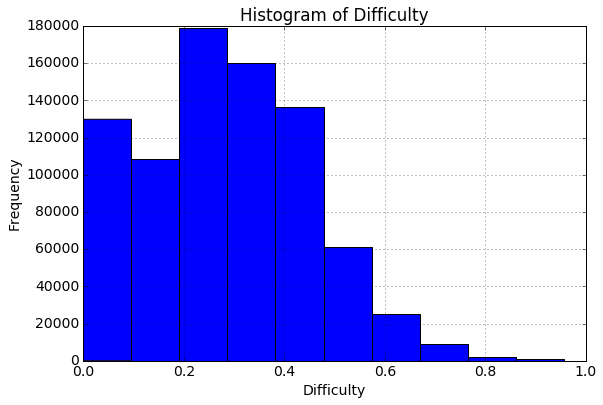

In [9]:
# hisogtam of difficulty
input_data['diff'].hist()
plt.title('Histogram of Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')

In [10]:
# input_data['opp_count'] = input_data['per_corr'] + input_data['per_incorr']

In [11]:
# pd.crosstab(input_data['opp_count'][:100], input_data['correct'][:100].astype(bool)).plot(kind='bar')
# plt.title('Num of pervious opportunities by by correctness')
# plt.xlabel('Num of pervious opportunity ')
# plt.ylabel('Frequency')

In [12]:
all_features = input_data.columns.tolist()
print all_features

['correct', 'skill_id', 'diff', 'pre_corr', 'pre_incorr']


In [13]:
label = 'correct'
all_features.remove(label)
predictors = all_features
categorical_features = ['skill_id']

In [14]:
model = LogisticRegression()
classification_model(model, input_data, predictors, label, categorical_features, k)

Predictors: ['skill_id', 'diff', 'pre_corr', 'pre_incorr']
auc: 0.68880899036
r2: 0.0849166340164
rmse: 0.425686034123
accuracy: 0.7340057184
